In [ ]:
Konteks: Optimasi Waktu dan Suhu dalam Proses Pengeringan
Kita ingin mengoptimalkan kadar air akhir (%) pada proses pengeringan dengan dua faktor:
A: Suhu Pengeringan (°C) → (50, 60, 70)
B: Waktu Pengeringan (menit) → (30, 45, 60)

Karena kita ingin menemukan nilai optimal (bukan sekadar melihat pengaruh faktor), Response Surface Methodology (RSM) digunakan dengan Central Composite Design (CCD).
CCD memiliki kombinasi titik eksperimen:
1. Factorial points (kombinasi ekstrem faktor)
2. Axial points (untuk menangkap efek kuadratik)
3. Center points (untuk estimasi variansi dan stabilitas model)

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from pyDOE2 import ccdesign

In [4]:
# 1. Buat desain eksperimen CCD (2 faktor)
ccd = ccdesign(2, center=(4,4))  # 2 faktor, 4 replikasi di titik tengah
df = pd.DataFrame(ccd, columns=["A", "B"])

In [5]:
# 2. Konversi level (-1,1) ke nilai aktual
A_min, A_max = 50, 70  # Suhu (°C)
B_min, B_max = 30, 60  # Waktu (menit)


df["A"] = df["A"] * (A_max - A_min) / 2 + (A_max + A_min) / 2
df["B"] = df["B"] * (B_max - B_min) / 2 + (B_max + B_min) / 2

In [6]:
# 3. Simulasikan response (Kadar Air %)
np.random.seed(42)
df["Kadar_Air"] = (
    10 - 0.1 * (df["A"] - 50) - 0.2 * (df["B"] - 30)
    + 0.01 * (df["A"] - 50) ** 2 + 0.02 * (df["B"] - 30) ** 2
    + np.random.normal(0, 0.5, len(df))
)

In [7]:
# 4. Analisis Regresi Kuadratik
model = smf.ols('Kadar_Air ~ A + B + I(A*2) + I(B*2) + A:B', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

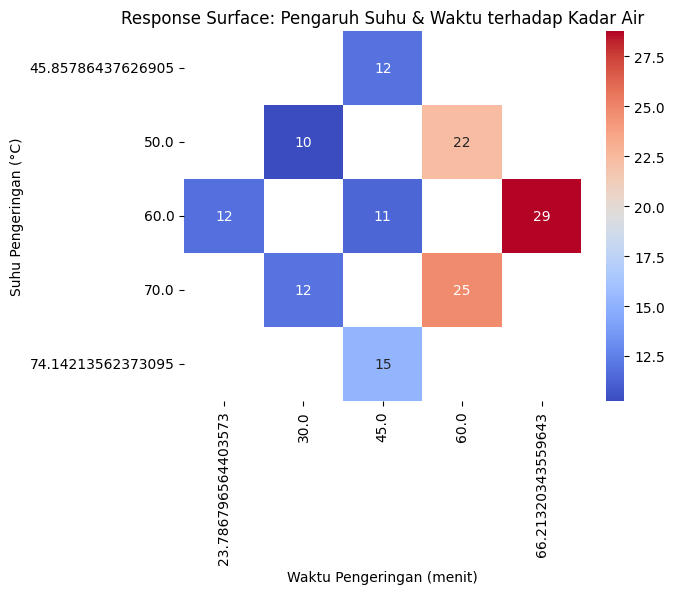

In [8]:
# 5. Visualisasi Response Surface
sns.heatmap(df.pivot_table(values="Kadar_Air", index="A", columns="B"), annot=True, cmap="coolwarm")
plt.title("Response Surface: Pengaruh Suhu & Waktu terhadap Kadar Air")
plt.xlabel("Waktu Pengeringan (menit)")
plt.ylabel("Suhu Pengeringan (°C)")
plt.show()

In [9]:
# 6. Output hasil
print(df)
print("\nANOVA Table:\n", anova_table)
print("\nModel Summary:\n", model.summary())

            A          B  Kadar_Air
0   50.000000  30.000000  10.248357
1   70.000000  30.000000  11.930868
2   50.000000  60.000000  22.323844
3   70.000000  60.000000  24.761515
4   60.000000  45.000000  11.382923
5   60.000000  45.000000  11.382932
6   60.000000  45.000000  12.289606
7   60.000000  45.000000  11.883717
8   45.857864  45.000000  11.851049
9   74.142136  45.000000  15.185494
10  60.000000  23.786797  11.783010
11  60.000000  66.213203  28.752416
12  60.000000  45.000000  11.620981
13  60.000000  45.000000  10.543360
14  60.000000  45.000000  10.637541
15  60.000000  45.000000  11.218856

ANOVA Table:
               sum_sq    df          F    PR(>F)
A           9.758915   1.0   0.650531  0.435617
B         298.956258   1.0  19.928469  0.000774
I(A * 2)    0.121919   1.0   0.008127  0.929655
I(B * 2)    2.718204   1.0   0.181196  0.677882
A:B         0.142567   1.0   0.009504  0.923950
Residual  180.017597  12.0        NaN       NaN

Model Summary:
                     

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A_grid, B_grid, Kadar_Air_grid, cmap='viridis', alpha=0.7)
ax.scatter(df['A'], df['B'], df['Kadar_Air'], color='red', label='Data Aktual')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('Kadar Air')
ax.set_title('Response Surface Method (RSM)')

plt.legend()
plt.show()